# Jakes model

In [83]:
import numpy as np
from numpy import matrix as mat
from numpy import concatenate as ct
from numpy import pi,cos,sin,sqrt,exp,abs,asarray,log10,\
zeros,polyfit,polyval,ceil, mean, real
import matplotlib.pyplot as plt
from numpy import ceil, log2
from collections import deque
from numpy.random import randn
from scipy.fftpack import fft,ifft, fftfreq

%matplotlib inline

In [361]:
fd= 226;
Ts= 1e-6;
M= 2**12;
Ns= 50000;
t0=0;
E0=1;
phi_N=0;
# t= [0:M-1]*Ts;
print('Jakes model')

Jakes model


In [362]:
t=np.arange(0,M)*Ts

In [363]:
f=np.arange(-M/2,M/2)/(M*Ts*fd)

In [364]:
N0=8;                  # As suggested by Jakes 
N=4*N0+2;             # an accurate approximation              
wd=2*np.pi*fd;           # Maximum doppler frequency[rad]

In [365]:
t = t0+np.arange(0,Ns)*Ts;  
tf = t[-1]+Ts; 

In [366]:
N0M=mat(np.arange(1,N0+1))

In [367]:
s1=mat(sqrt(2)*cos(wd*t))
s=2*cos(wd*cos(2*pi/N*N0M).T*t)

In [368]:
coswt=ct((s1, s), axis=0)

In [369]:
th=ct((mat(phi_N),pi/(N0+1)*N0M),axis=1)

In [370]:
h=E0/sqrt(2*N0+1)*exp(1j*th)*coswt

In [371]:
h_mag=abs(h)

In [372]:
h_mag_dB=log10(asarray(h_mag[0,:])[0,:])

In [373]:
tt=np.arange(1,Ns+1)*Ts

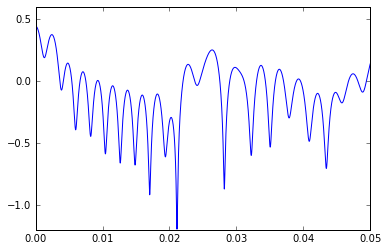

In [374]:
plt.plot(tt,h_mag_dB)
plt.show()

# Clarke model

In [155]:
def dopler_spectrum(fd,Nfft):
    df = 2*fd/Nfft
    f=mat(zeros(int(Nfft/2)))
    y=mat(zeros(int(Nfft)))
    f[0,0] = 0;  
    y[0,0] = 2*1.5/(pi*fd);   
    rg=list(range(1,int(Nfft/2)))
    for i in rg:
        f[0,i] = (i-1)*df
        num=pi*fd*sqrt(1-((f[0,i]/fd)**2))
        y[0,i]=y[0,(Nfft-i)]=1.5/num 
    #     print(i,Nfft-i)
    #print(y)
    nFitPoints=3 
    kk=list(range(int(Nfft/2-nFitPoints)-1,int(Nfft/2)))
    # 
    polyFreq = polyfit(f[0,kk].tolist()[0],y[0,kk].tolist()[0],nFitPoints);
    # 
    y[0,int(Nfft/2)] = polyval(polyFreq,f[0,int(Nfft/2)-1]+df)
    return y

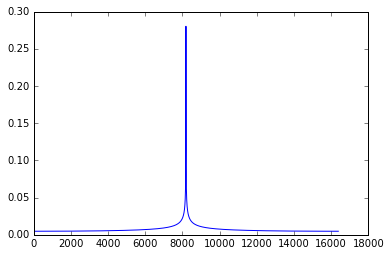

In [72]:
Nfft=16384
fd=100

y = dopler_spectrum(fd,Nfft)
# 
plt.plot(y.tolist()[0])
plt.show()

In [59]:
y.shape

(1, 16384)

In [5]:
def nextpow2(x):
    res = ceil(log2(x))
    return res.astype('int')  #we want integer values only but ceil gives float


In [156]:
fm=100;   # Maximum Doppler frquency
ts_mu=50; scale=1e-6; ts=ts_mu*scale; # Sampling time
fs=1/ts;  # Sampling frequency
Nd=int(1e6);   # Number of samples


N=Nd#1000000

In [157]:
Nfft=2**max([3,nextpow2(2*fm/fs*N)])

In [158]:
Nifft=int(ceil(Nfft*fs/(2*fm)))

In [160]:
GI=randn(1,Nfft)
GQ=randn(1,Nfft)

In [161]:
CGI = fft(GI);       
CGQ = fft(GQ);

In [164]:
doppler_coeff = dopler_spectrum(fm,Nfft)

In [166]:
f_CGI = np.multiply(CGI,sqrt(doppler_coeff))
f_CGQ = np.multiply(CGQ,sqrt(doppler_coeff))

In [167]:
tzeros= mat(zeros(Nifft-Nfft,dtype=complex));

In [168]:
c1=ct((f_CGI[0,:Nfft/2],tzeros), axis=1)
Filtered_CGI=ct((c1,f_CGI[0,Nfft/2:Nfft]), axis=1)

In [169]:
c1=ct((f_CGQ[0,:Nfft/2],tzeros), axis=1)
Filtered_CGQ=ct((c1,f_CGQ[0,Nfft/2:Nfft]), axis=1)

In [170]:
hI = np.asarray(ifft(Filtered_CGI));  
hQ= np.asarray(ifft(Filtered_CGQ));

In [171]:
rayEnvelope = sqrt(abs(hI)**2 + abs(hQ)**2);

In [172]:
rayRMS = sqrt(mean(rayEnvelope[:N]*rayEnvelope[:N]))

In [182]:
h = real(hI[0,:N])/rayRMS-1j*real(hQ[0,:N])/rayRMS;
h_mag_dB=10*log10(abs(h))
h_mag=abs(h)

In [183]:
tt=np.arange(0,Nd)*ts

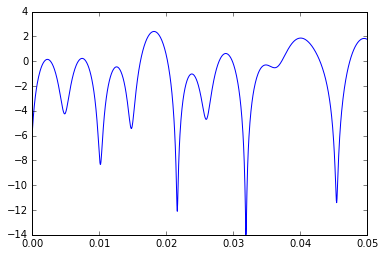

In [184]:
Nsm=1000
plt.plot(tt[:Nsm],h_mag_dB[:Nsm])
plt.show()

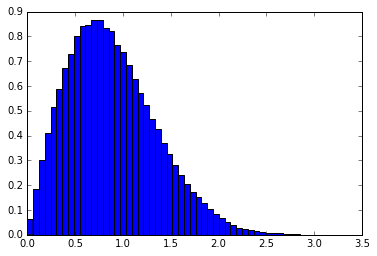

In [185]:
plt.hist(h_mag, 50, normed=True)
plt.show()

In [186]:
np.angle(h)

array([-2.14949506, -2.14889636, -2.1484315 , ...,  1.32440972,
        1.30975974,  1.29494327])

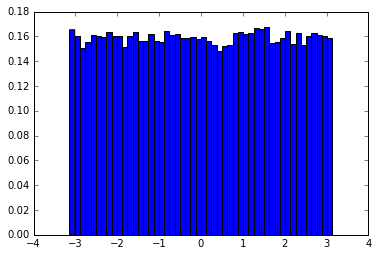

In [188]:
plt.hist(np.angle(h), 50, normed=True)
plt.show()